**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> DỰ ĐOÁN KHÁCH HÀNG RỜI BỎ DỊCH VỤ VIỄN THÔNG 📈</span> </center>**

## Đọc-Hiểu dữ liệu

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns  # Thư viện để vẽ đồ thị dựa trên matplotlib

# Import các thư viện Plotly để vẽ đồ thị tương tác
import plotly.express as px  # API cấp cao giúp tạo các đồ thị một cách nhanh chóng và dễ dàng
import plotly.graph_objects as go  # Lớp hỗ trợ tạo các đối tượng đồ thị phức tạp hơn
from plotly.subplots import make_subplots  # Hàm để tạo các đồ thị con (subplots)

# Import thư viện để kiểm soát cảnh báo trong Python
import warnings  
warnings.filterwarnings('ignore')  # Bỏ qua tất cả các cảnh báo

from sklearn.metrics import accuracy_score # Đánh giá mô hình dựa trên độ chính xác

# Các phương pháp đánh giá khác cho mô hình phân loại
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes
4718,3556-BVQGL,Female,0,Yes,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.00,416.45,No
6034,7353-YOWFP,Female,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.25,129.15,No
5088,1399-OUPJN,Female,0,Yes,Yes,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1272.05,No
1504,1769-GRUIK,Female,0,No,No,18,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.10,1247.75,No


In [3]:
#biến phụ thuộc, mục tiêu, dự đoán là Churn
#còn lại là biến độc lập
df.Churn.value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Ta có thể thấy sự mất cân bằng trong dữ liệu

In [4]:
df.shape[0]

7043

In [7]:
1869*100/df.shape[0] #Tính % tỷ lệ KH churn

26.536987079369588

In [3]:
df.drop('customerID', axis='columns', inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Ta phát hiện TotalCharges hiển thị bằng số, nhưng dạng của nó lại ở dạng object, phải chuyển thành số

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [4]:
pd.to_numeric(df. TotalCharges, errors='coerce' ).isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
df.shape 

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

7042-7032=11 rỗng
<br>
<b>Remove 11 giá trị rỗng</b>

In [7]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

chuyển sang số thành công

In [9]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## Trực quan hóa dữ liệu

<b>Data Visualization</b>

## gender

In [21]:
# Định nghĩa nhãn cho 2 biểu đồ Gender và Churn
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Tạo một đối tượng subplot với một hàng và hai cột. Mỗi subplot sẽ chứa một biểu đồ hình tròn.
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#Thêm hai biểu đồ hình tròn vào subplot. Mỗi biểu đồ hình tròn sẽ hiển thị phân phối của một biến cụ thể (gender hoặc Churn).
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Chúng ta cũng sử dụng thuộc tính 'hole' để tạo ra biểu đồ tròn giống như hình donut,
#  và cập nhật kích thước chữ và thông tin hiển thị khi di chuột qua biểu đồ.
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
# Cập nhật layout của subplot. 
fig.update_layout(
    title_text="Gender and Churn",
    # Thêm tiêu đề cho subplot và các chú thích ở giữa các biểu đồ hình tròn.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
#Hiển thị subplot.
fig.show()

* 26,6% khách hàng chuyển sang hãng khác.
* Khách hàng là 49,5% nữ và 50,5% nam.

In [351]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [352]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

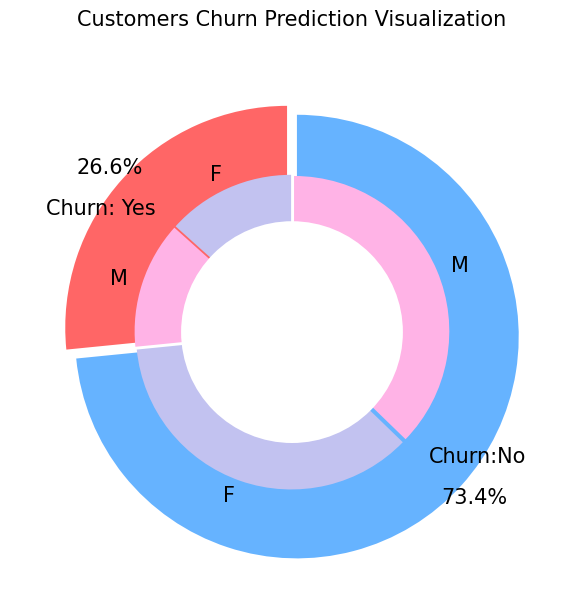

In [353]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Customers Churn Prediction Visualization', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* Không có sự khác biệt đáng kể trong tỷ lệ/phần trăm khách hàng chuyển đổi nhà cung cấp dịch vụ. Cả hai giới tính đều có hành vi tương tự khi chuyển đổi sang nhà cung cấp/dịch vụ khác
==> Giới tính không có ý nghĩa trong việc dự đoán

## Contract

In [354]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customers Churn Prediction Visualization<b>")
fig.update_layout(width=700, height=500, bargap=0.1) #bargap khoảng cách giữa các thanh
fig.show()

* Khoảng 75% khách hàng ký Hợp đồng theo tháng chọn chuyển đi so với 13% khách hàng ký Hợp đồng Một năm và 3% ký Hợp đồng Hai năm

## PaymentMethod

In [355]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Customers Churn Prediction Visualization</b>")
fig.show()

In [356]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Churn Prediction Visualization</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Các khách hàng chính đã chuyển đi thường sử dụng Phương thức thanh toán là Electronic Check.
* Các khách hàng chọn Chuyển khoản tự động qua thẻ tín dụng hoặc Chuyển khoản tự động qua ngân hàng và Thanh toán bằng Check qua dịch vụ thư tín dụng ít có khả năng chuyển đi.

## InternetService


In [357]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [358]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [359]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [360]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Prediction Visualization</b>")

fig.show()

* Có rất nhiều khách hàng chọn dịch vụ cáp quang và rõ ràng rằng những khách hàng sử dụng dịch vụ cáp quang có tỷ lệ chuyển mạng cao, điều này có thể gợi ý mức độ không hài lòng với loại dịch vụ internet này.
* Khách hàng sử dụng dịch vụ DSL chiếm đa số và có tỷ lệ chuyển mạng thấp hơn so với dịch vụ cáp quang.

## Dependents

In [361]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn Prediction Visualization</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Khách hàng không có người phụ thuộc có nhiều khả năng rời bỏ hơn

## Partner

In [362]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn Prediction Visualization</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Khách hàng không có đối tác có nhiều khả năng rời bỏ hơn

## SeniorCitizen

In [363]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Phân phối Rời bỏ liên quan đến Người cao tuổi</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)

* Có thể thấy tỷ lệ người cao tuổi rất ít.
* Hầu hết người cao tuổi đều rời bỏ.

## OnlineSecurity

In [364]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn Prediction Visualization</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Hầu hết khách hàng rời bỏ mạng vì không có bảo mật trực tuyến

## PaperlessBilling

In [365]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn Prediction Visualization</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Những khách hàng sử dụng Thanh toán không cần giấy tờ có nhiều khả năng rời bỏ nhất.

## TechSupport

In [366]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn Prediction Visualization</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Những khách hàng không có TechSupport có nhiều khả năng chuyển sang nhà cung cấp dịch vụ khác.

## PhoneService

In [367]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn Prediction Visualization</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Một phần rất nhỏ khách hàng sử dụng có dịch vụ điện thoại và trong số đó, 1/3 Khách hàng có nhiều khả năng rời bỏ hơn.

## tenure

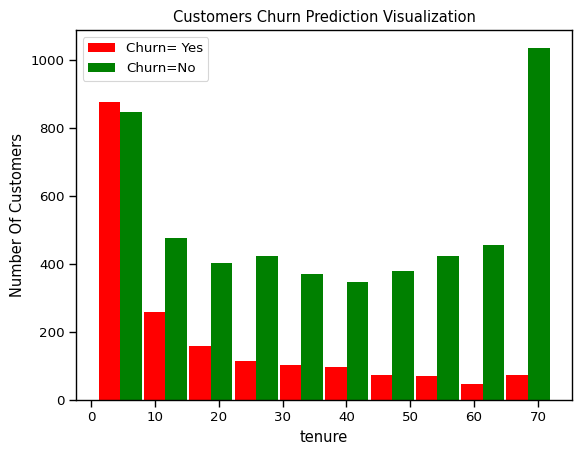

In [368]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customers Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth= 0.95, color=['red','green'],label=['Churn= Yes',"Churn=No"])
plt.legend()

* Khách hàng mới có nhiều khả năng rời bỏ hơn

## MonthlyCharges

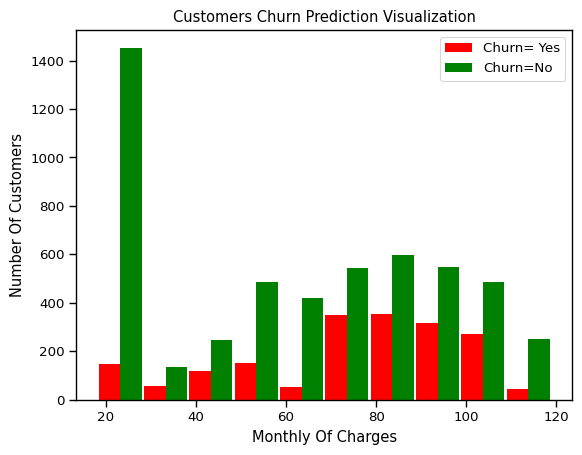

In [369]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Of Charges")
plt.ylabel("Number Of Customers")
plt.title("Customers Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth= 0.95, color=['red','green'],label=['Churn= Yes',"Churn=No"])
plt.legend()

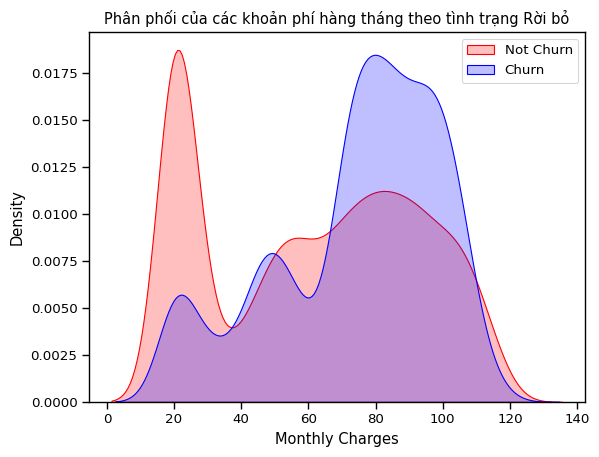

In [370]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Phân phối của các khoản phí hàng tháng theo tình trạng Rời bỏ');

* Khách hàng có Phí hàng tháng cao hơn cũng có nhiều khả năng rời bỏ hơn

## TotalCharges

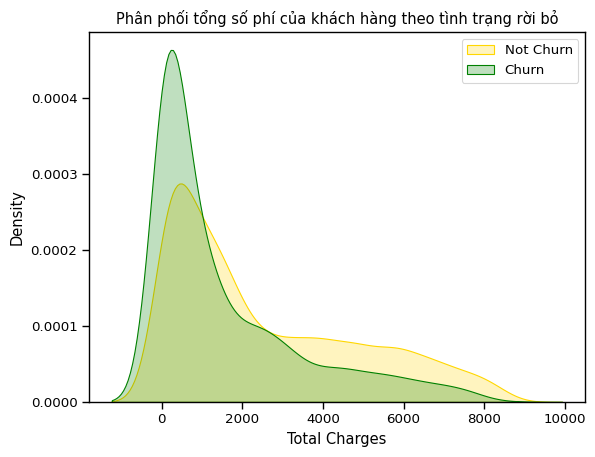

In [371]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Phân phối tổng số phí của khách hàng theo tình trạng rời bỏ');

* Khách hàng có Tổng chi phí ít hơn cũng có nhiều khả năng rời bỏ hơn

## Tiền xử lý dữ liệu

In [10]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [11]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<b>replace</b>

In [12]:
df1.replace('No internet service','No', inplace= True)
df1.replace('No phone service','No', inplace= True)

In [13]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace = True)

In [15]:
for col in df1:
    print(f'{col}:{df1[col].unique()})')

gender:['Female' 'Male'])
SeniorCitizen:[0 1])
Partner:[1 0])
Dependents:[0 1])
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39])
PhoneService:[0 1])
MultipleLines:[0 1])
InternetService:['DSL' 'Fiber optic' 'No'])
OnlineSecurity:[0 1])
OnlineBackup:[1 0])
DeviceProtection:[0 1])
TechSupport:[0 1])
StreamingTV:[0 1])
StreamingMovies:[0 1])
Contract:['Month-to-month' 'One year' 'Two year'])
PaperlessBilling:[1 0])
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ])
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ])
Churn:[0 1])


In [16]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [17]:
df1.gender.unique()

array([1, 0], dtype=int64)

<b>One hot encodeing for categorical coulumns</b>

In [18]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6762,0,0,0,0,35,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
6461,0,0,1,0,49,1,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
267,1,1,0,0,19,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
5872,1,0,0,1,1,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
2048,0,1,0,0,21,1,0,0,0,1,...,False,True,False,True,False,False,True,False,False,False


In [20]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [21]:
df2[['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                   'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                   'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']] = df2[['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                   'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                   'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].astype('uint8')
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1320,0,0,1,1,32,1,0,1,1,1,...,0,1,0,0,1,0,0,0,0,1
123,1,0,1,1,7,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4985,1,0,1,1,72,1,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
560,0,0,1,0,56,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5519,0,0,1,0,1,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1


In [22]:
# Lấy giá trị min và max cho cột 'tenure'
min_tenure = df2['tenure'].min()
max_tenure = df2['tenure'].max()

# Lấy giá trị min và max cho cột 'MonthlyCharges'
min_monthly_charges = df2['MonthlyCharges'].min()
max_monthly_charges = df2['MonthlyCharges'].max()

# Lấy giá trị min và max cho cột 'TotalCharges'
min_total_charges = df2['TotalCharges'].min()
max_total_charges = df2['TotalCharges'].max()

# In ra kết quả
print(f'Min and Max values for tenure: {min_tenure}, {max_tenure}')
print(f'Min and Max values for MonthlyCharges: {min_monthly_charges}, {max_monthly_charges}')
print(f'Min and Max values for TotalCharges: {min_total_charges}, {max_total_charges}')

Min and Max values for tenure: 1, 72
Min and Max values for MonthlyCharges: 18.25, 118.75
Min and Max values for TotalCharges: 18.8, 8684.8


In [23]:
#Ta tiến hành chọn các cột Scaling
col_to_scale = ["tenure", 'MonthlyCharges', 'TotalCharges']
#Sử Dụng Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

giúp mô hình dễ dàng học từ dữ liệu và làm cho các trọng số trong mô hình có thứ bậc tương đối giống nhau, tránh tình trạng một biến có giá trị lớn quá mức ảnh hưởng đến mô hình.

In [25]:
# Lấy giá trị min và max cho cột 'tenure'
min_tenure = df2['tenure'].min()
max_tenure = df2['tenure'].max()

# Lấy giá trị min và max cho cột 'MonthlyCharges'
min_monthly_charges = df2['MonthlyCharges'].min()
max_monthly_charges = df2['MonthlyCharges'].max()

# Lấy giá trị min và max cho cột 'TotalCharges'
min_total_charges = df2['TotalCharges'].min()
max_total_charges = df2['TotalCharges'].max()

# In ra kết quả
print(f'Min and Max values for tenure: {min_tenure}, {max_tenure}')
print(f'Min and Max values for MonthlyCharges: {min_monthly_charges}, {max_monthly_charges}')
print(f'Min and Max values for TotalCharges: {min_total_charges}, {max_total_charges}')

Min and Max values for tenure: 0.0, 1.0
Min and Max values for MonthlyCharges: 0.0, 0.9999999999999999
Min and Max values for TotalCharges: 0.0, 0.9999999999999999


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [40]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
479,1,0,0,1,0.197183,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3354,1,0,0,0,0.746479,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1529,1,0,1,0,0.816901,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1041,1,0,0,1,0.211268,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
6641,1,0,0,0,0.211268,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0



Mức độ quan trọng của đặc trưng:
TotalCharges                               0.187485
MonthlyCharges                             0.172453
tenure                                     0.162386
Contract_Month-to-month                    0.060872
InternetService_Fiber optic                0.037096
PaymentMethod_Electronic check             0.035828
gender                                     0.027821
PaperlessBilling                           0.025997
Partner                                    0.023721
OnlineSecurity                             0.021707
TechSupport                                0.020610
OnlineBackup                               0.020466
Contract_Two year                          0.019919
SeniorCitizen                              0.019852
Dependents                                 0.019343
MultipleLines                              0.019043
StreamingMovies                            0.018342
DeviceProtection                           0.018179
StreamingTV                   

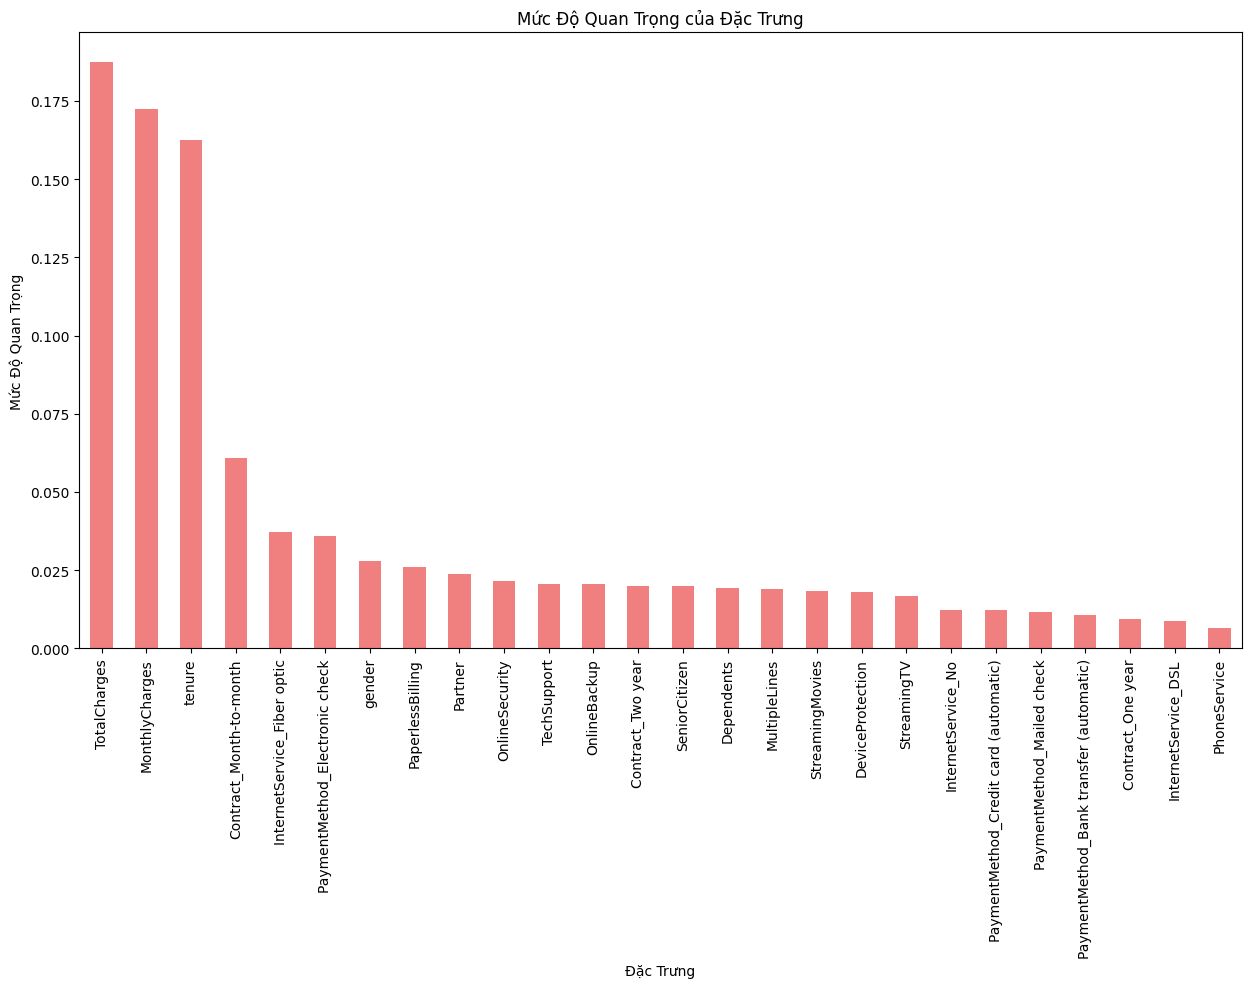

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình RandomForest để đo lường mức độ quan trọng của đặc trưng
model = RandomForestClassifier(random_state=15)
model.fit(X_train, y_train)

# Hiển thị mức độ quan trọng của từng đặc trưng
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nMức độ quan trọng của đặc trưng:")
print(feature_importances)

# Vẽ biểu đồ mức độ quan trọng của đặc trưng
plt.figure(figsize=(15, 8))
feature_importances.plot(kind='bar', color='lightcoral')
plt.title('Mức Độ Quan Trọng của Đặc Trưng')
plt.xlabel('Đặc Trưng')
plt.ylabel('Mức Độ Quan Trọng')
plt.show()

## XÂY DỰNG MODEL

## Chưa xử lý mất cân bằng dữ liệu

## TH: 100% đặc trưng

<b>Train Test Split</b>

In [42]:
X = df2.drop('Churn', axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 15, stratify=y)

test_size=0.2: Đây chỉ đơn giản là cách chúng ta chia dữ liệu. Ở đây, chúng ta đang chia 20% dữ liệu để kiểm tra mô hình của mình, và phần còn lại 80% dữ liệu để huấn luyện mô hình.

random_state=15: Đây giống như việc bạn xáo bài trước khi chia cho mọi người chơi. Đặt random_state=15 giúp đảm bảo rằng mỗi lần bạn xáo và chia bài (hoặc trong trường hợp này, chia dữ liệu), bạn sẽ nhận được cùng một kết quả.

stratify=y: Đây là cách để đảm bảo rằng khi chúng ta chia dữ liệu, tỷ lệ các lớp trong dữ liệu huấn luyện và kiểm tra sẽ giống như tỷ lệ trong dữ liệu gốc. Ví dụ, nếu trong dữ liệu gốc của bạn, 25% là lớp A và 75% là lớp B, thì sau khi chia, dữ liệu huấn luyện và kiểm tra cũng sẽ có tỷ lệ tương tự.

In [44]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [46]:
5163/1869

2.7624398073836276

In [47]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [395]:
X_train.shape

(5625, 26)

In [396]:
X_test.shape

(1407, 26)

In [397]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [398]:
len(X_train.columns)

26

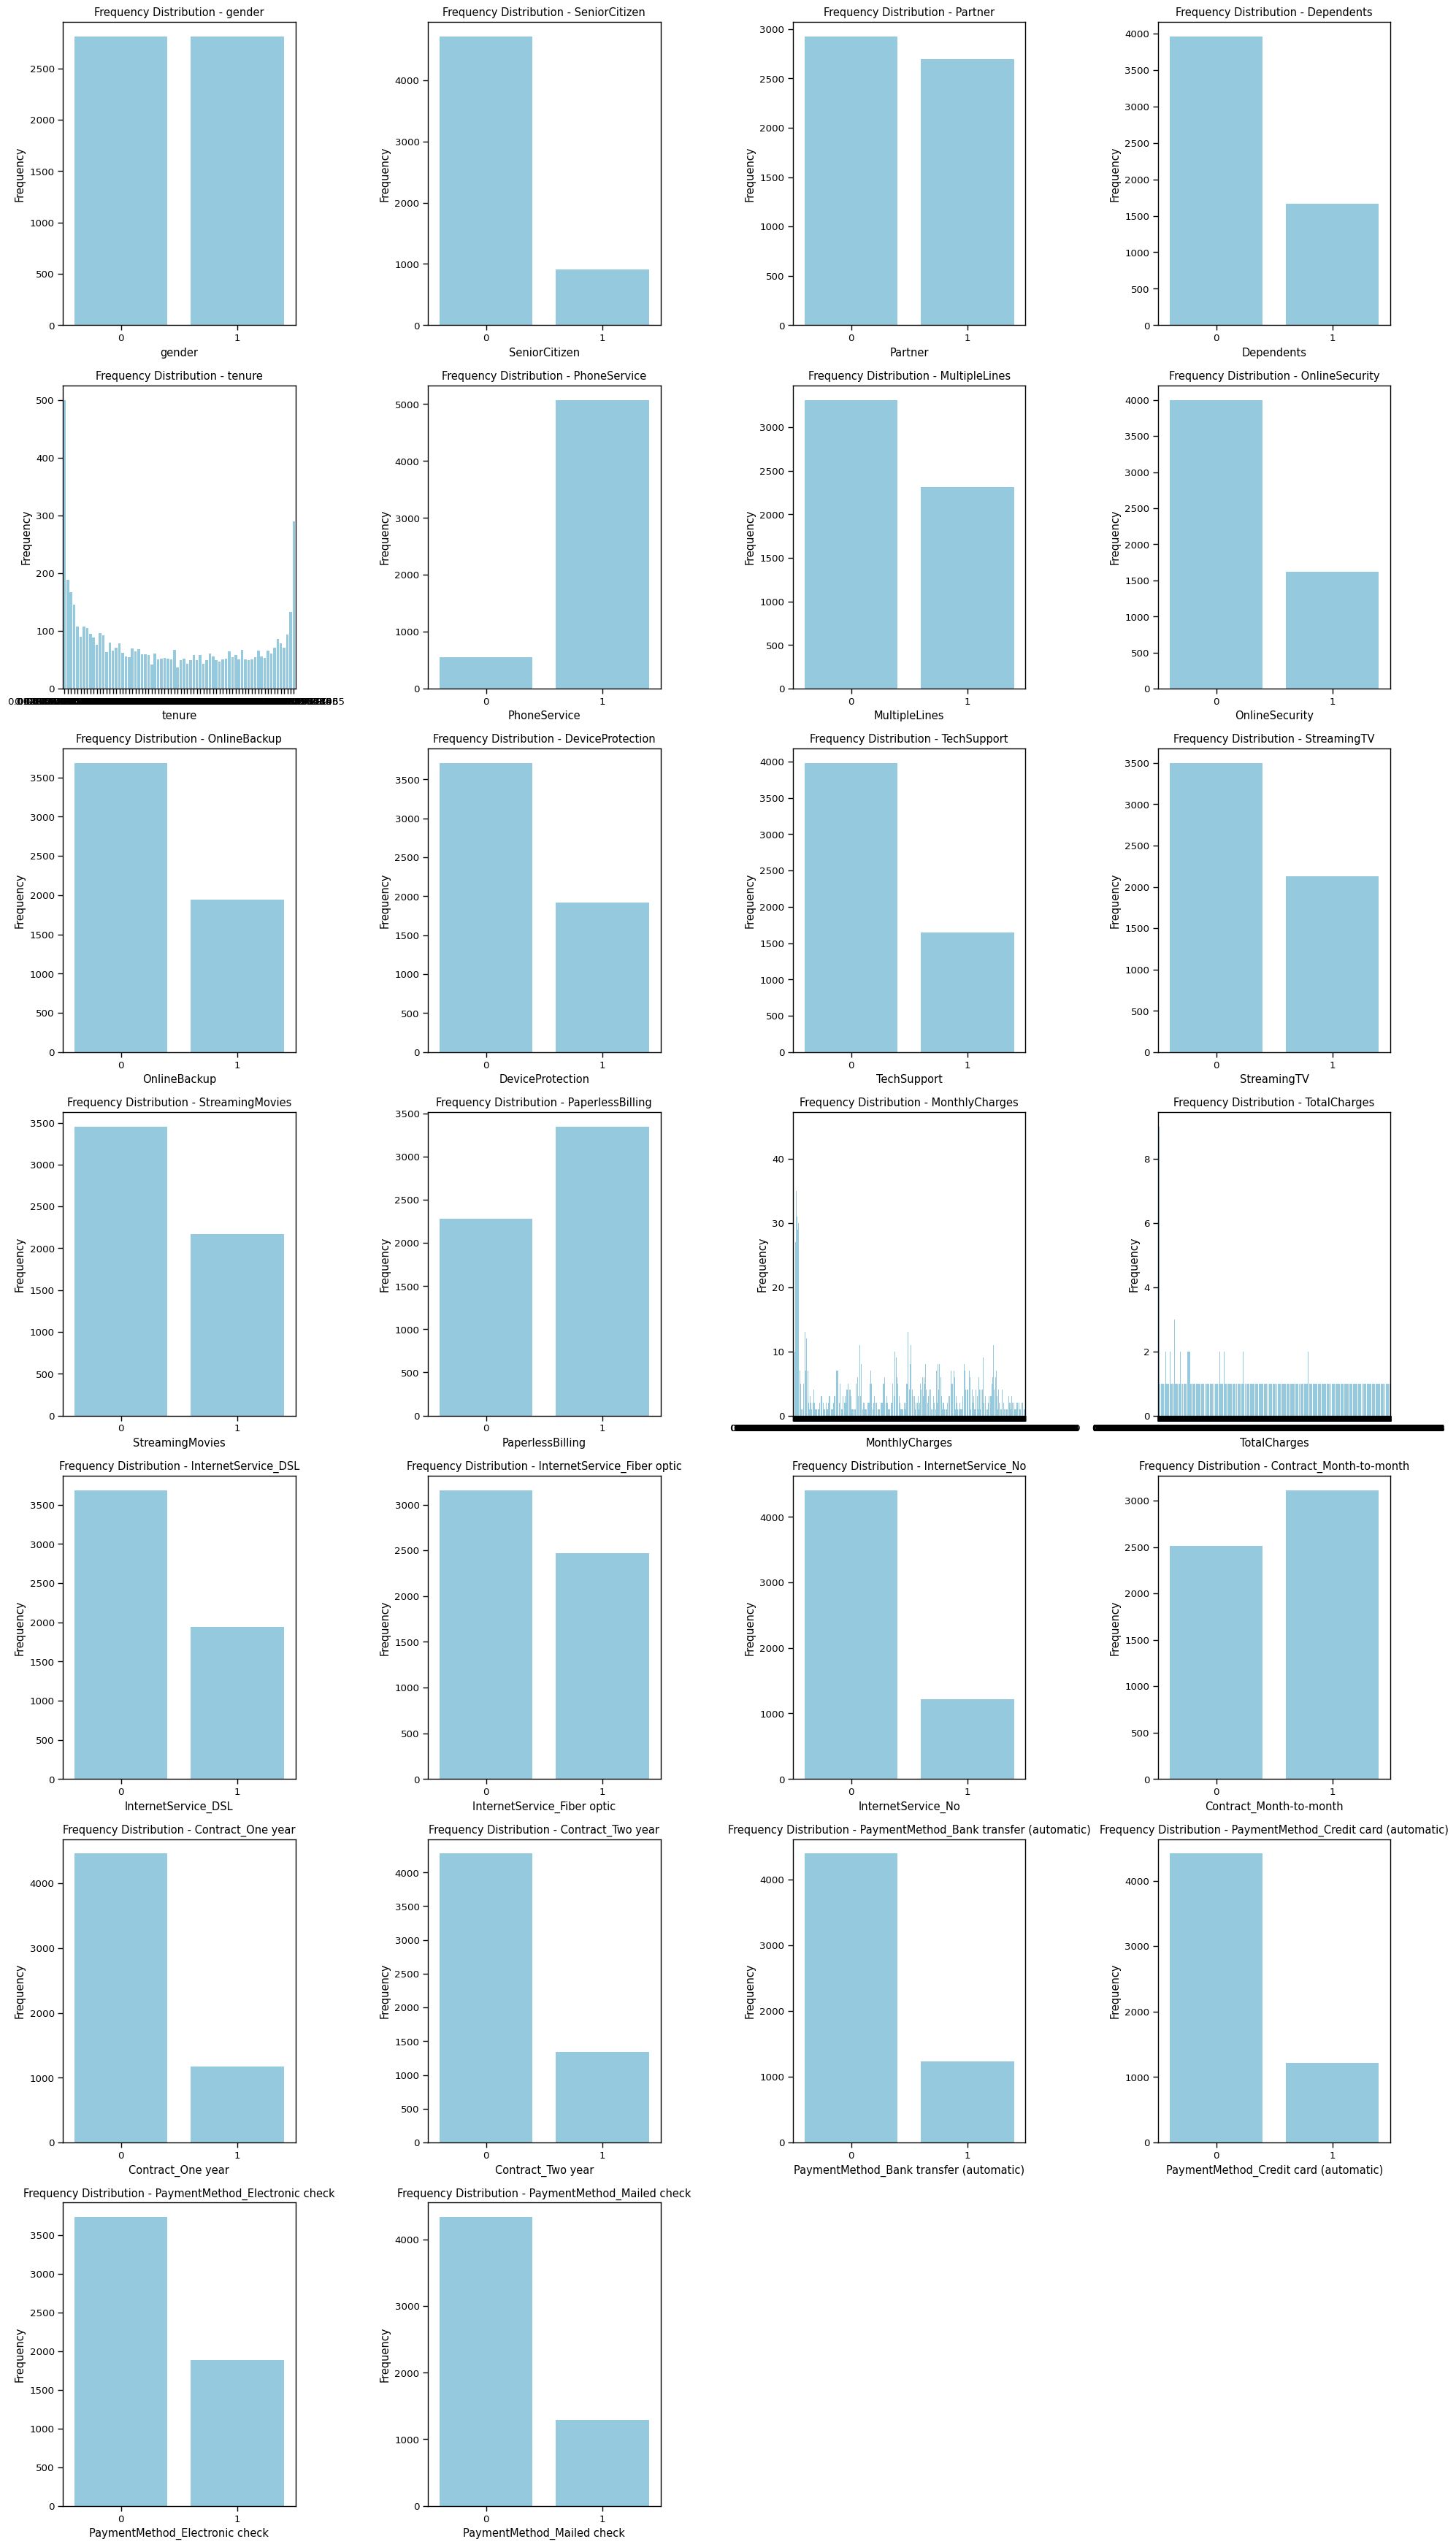

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

# Số cột trong mỗi dòng của lưới
num_cols_per_row = 4

# Số cột trong lưới
num_cols = len(X_train.columns)

# Số dòng của lưới
num_rows = -(-num_cols // num_cols_per_row)  # làm tròn lên khi chia

# Thiết lập lưới subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Vòng lặp qua từng đặc trưng và vẽ biểu đồ
for i, column in enumerate(X_train.columns):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    ax = axes[row, col]
    
    # Sử dụng seaborn để vẽ biểu đồ bar
    sns.countplot(x=X_train[column], ax=ax, color='skyblue')
    
    ax.set_title(f'Frequency Distribution - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Ẩn các subplot không sử dụng (nếu có)
for i in range(num_cols, num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Số cột trong mỗi dòng của lưới
# num_cols_per_row = 4

# # Thiết lập lưới subplot
# fig, axes = plt.subplots(nrows=-(-len(X_train.columns) // num_cols_per_row), ncols=num_cols_per_row, figsize=(20, 5 * num_rows))
# fig.subplots_adjust(hspace=0.5)

# # Vòng lặp qua từng đặc trưng và vẽ biểu đồ
# for ax, column in zip(axes.flatten(), X_train.columns):
#     sns.countplot(x=X_train[column], ax=ax, color='skyblue')
#     ax.set_title(f'Frequency Distribution - {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Frequency')

# # Ẩn các subplot không sử dụng (nếu có)
# for ax in axes.flatten()[len(X_train.columns):]:
#     fig.delaxes(ax)

# plt.tight_layout()
# plt.show()


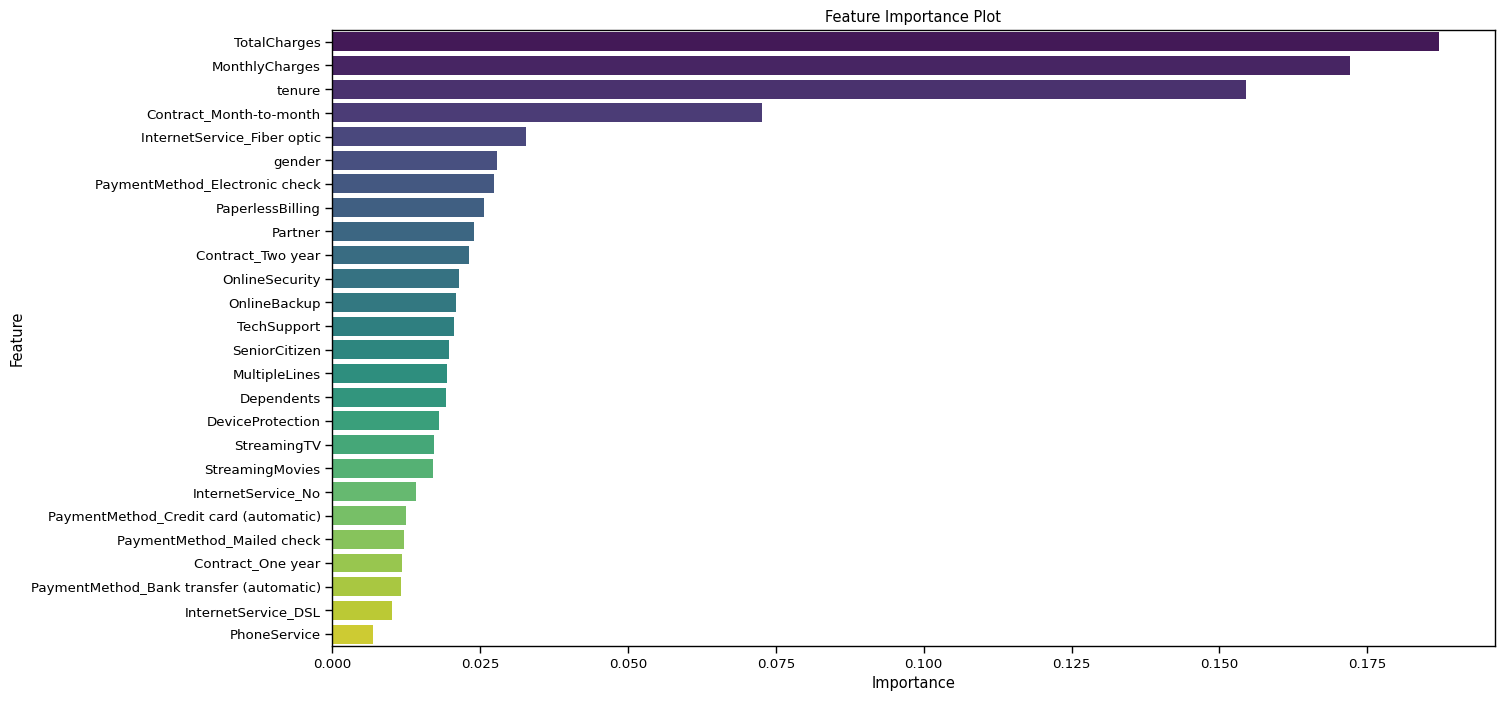

In [401]:
from sklearn.ensemble import RandomForestClassifier

# Sử dụng mô hình RandomForest để đánh giá mức độ quan trọng của đặc trưng
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Lấy mức độ quan trọng của đặc trưng
feature_importances = model.feature_importances_

# Tạo DataFrame để hiển thị mức độ quan trọng của đặc trưng
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sắp xếp DataFrame theo mức độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Biểu đồ cột cho mức độ quan trọng của đặc trưng
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Plot')
plt.show()


<b>Sử dụng Logictics Regression classifier</b>

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

In [ ]:
# def log_reg(X_train, y_train, X_test, y_test, weights):
#     if weights == -1:
#         model = LogisticRegression()
#     else:
#         model = LogisticRegression(class_weight={0:weights[0],1:weights[1]})
#     model = LogisticRegression()
#     model.fit(X_train, y_train)
#     acc = model.score(X_test, y_test)
#     print("Accuracy: ", acc, "\n")

#     y_pred = model.predict(X_test)
#     print("preds: ", y_pred[:5], "\n")

#     cl_rep = classification_report(y_test,y_pred)
#     print(cl_rep)

In [ ]:
# weights = -1 #pass -1 to use LogisticRegression without weights
# log_reg(X_train, y_train,X_test, y_test, weights)

In [ ]:
# weights = [1, 1.5] #pass -1 to use LogisticRegression without weights
# log_reg(X_train, y_train,X_test, y_test, weights)

<b>Sử dụng KNN CLassifier<b>

<b>New<b>


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def knn_model(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: ", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds: ", y_pred[:5], "\n")

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

    # Tạo ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Biểu diễn ma trận nhầm lẫn dưới dạng DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # In ma trận nhầm lẫn dưới dạng bảng số
    print(conf_matrix_df)

# Sử dụng hàm với số lượng hàng xóm là 81
knn_model(X_train, y_train, X_test, y_test, n_neighbors=81)


Accuracy:  0.8059701492537313 

preds:  [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1033
         1.0       0.64      0.63      0.63       374

    accuracy                           0.81      1407
   macro avg       0.75      0.75      0.75      1407
weighted avg       0.81      0.81      0.81      1407

          Predicted 0  Predicted 1
Actual 0          898          135
Actual 1          138          236


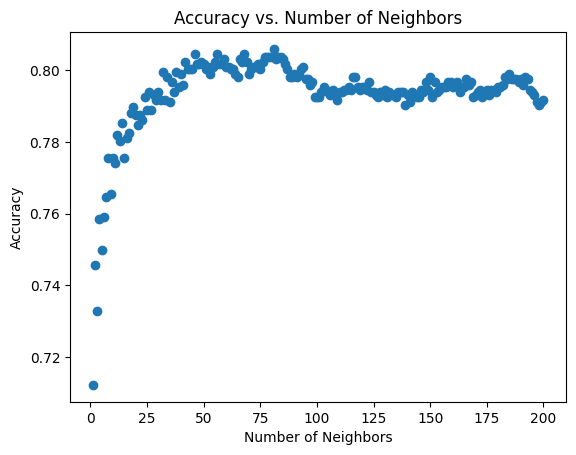

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Hàm huấn luyện và đánh giá mô hình
def knn_model(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc

# Số lượng hàng xóm từ 1 đến 20
n_neighbors_list = list(range(1, 201))

# Lưu trữ kết quả của từng số lượng hàng xóm
accuracy_list = []

# Duyệt qua từng số lượng hàng xóm và thực hiện chia tập dữ liệu
for n_neighbors in n_neighbors_list:
    accuracy = knn_model(X_train, y_train, X_test, y_test, n_neighbors)
    accuracy_list.append(accuracy)

# Vẽ biểu đồ scatter
plt.scatter(n_neighbors_list, accuracy_list)
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


<b>Sử dụng DecisionTree Classifier<b>

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

def decision_tree_model(X_train, y_train, X_test, y_test, max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: ", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds: ", y_pred[:5], "\n")

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

# Sử dụng hàm với độ sâu tối đa là 5
decision_tree_model(X_train, y_train, X_test, y_test, max_depth=5)


Accuracy:  0.7953091684434968 

preds:  [0. 0. 0. 0. 0.] 

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1033
         1.0       0.62      0.60      0.61       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



In [407]:
# Giả sử y_test là nhãn thực tế và y_pred là kết quả dự đoán từ mô hình
# Bạn cần thay thế chúng bằng kết quả thực tế và dự đoán từ mô hình của bạn
y_test_actual = y_test
y_pred_model = y_pred

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_actual, y_pred_model)

# Biểu diễn ma trận nhầm lẫn dưới dạng DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# In ma trận nhầm lẫn dưới dạng bảng số
print(conf_matrix_df)


          Predicted 0  Predicted 1
Actual 0          779          254
Actual 1          263          111


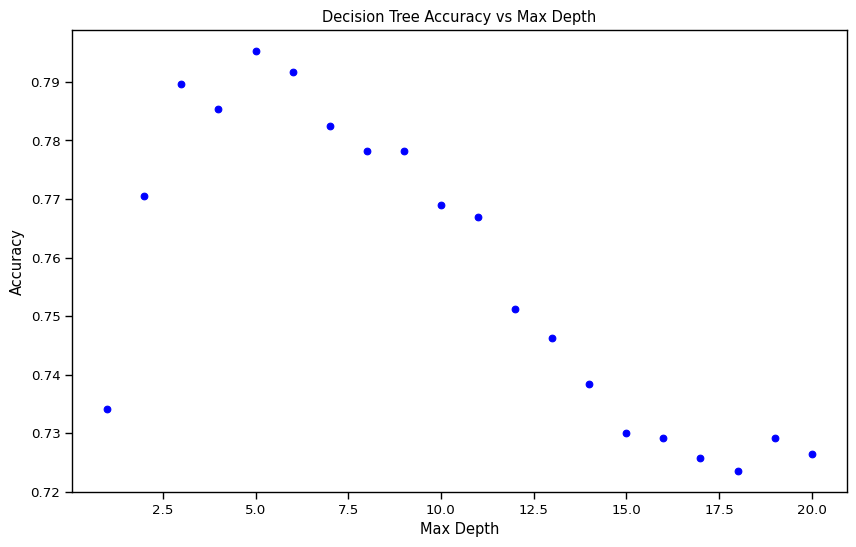

In [406]:
import matplotlib.pyplot as plt

def decision_tree_model(X_train, y_train, X_test, y_test, max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return max_depth, acc

# Lưu trữ kết quả của từng lần thử nghiệm
max_depth_values = []
accuracy_values = []

# Thực hiện tìm kiếm độ sâu tối ưu từ 1 đến 20
for max_depth in range(1, 21):
    max_depth_val, acc_val = decision_tree_model(X_train, y_train, X_test, y_test, max_depth)
    max_depth_values.append(max_depth_val)
    accuracy_values.append(acc_val)

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(max_depth_values, accuracy_values, color='blue')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


<b>Sử dụng Random Forest Classifier</b>

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def random_forest_model(X_train, y_train, X_test, y_test, n_estimators=100):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: ", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds: ", y_pred[:5], "\n")

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

# Sử dụng hàm với số lượng cây là 800
random_forest_model(X_train, y_train, X_test, y_test, n_estimators=800)


Accuracy:  0.7903340440653873 

preds:  [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1033
         1.0       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# def random_forest_model(X_train, y_train, X_test, y_test, n_estimators):
#     model = RandomForestClassifier(n_estimators=n_estimators)
#     model.fit(X_train, y_train)
#     acc = model.score(X_test, y_test)
#     return n_estimators, acc

# # Lưu trữ kết quả của từng lần thử nghiệm
# n_estimators_values = []
# accuracy_values = []

# # Thực hiện tìm kiếm số lượng cây tối ưu từ 700 đến 800
# for n_estimators in range(700, 801):
#     n_estimators_val, acc_val = random_forest_model(X_train, y_train, X_test, y_test, n_estimators)
#     n_estimators_values.append(n_estimators_val)
#     accuracy_values.append(acc_val)

# # Vẽ biểu đồ scatter
# plt.figure(figsize=(10, 6))
# plt.scatter(n_estimators_values, accuracy_values, color='green')
# plt.title('Random Forest Accuracy vs Number of Estimators')
# plt.xlabel('Number of Estimators')
# plt.ylabel('Accuracy')
# plt.show()


In [409]:
# Giả sử y_test là nhãn thực tế và y_pred là kết quả dự đoán từ mô hình
# Bạn cần thay thế chúng bằng kết quả thực tế và dự đoán từ mô hình của bạn
y_test_actual = y_test
y_pred_model = y_pred

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_actual, y_pred_model)

# Biểu diễn ma trận nhầm lẫn dưới dạng DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# In ma trận nhầm lẫn dưới dạng bảng số
print(conf_matrix_df)


          Predicted 0  Predicted 1
Actual 0          779          254
Actual 1          263          111


Ma trận nhầm lẫn này thể hiện hiệu suất của mô hình dự đoán:

True Positives (TP): 39 - Số lượng trường hợp mô hình đúng dự đoán là 1.
True Negatives (TN): 1008 - Số lượng trường hợp mô hình đúng dự đoán là 0.
False Positives (FP): 25 - Số lượng trường hợp mô hình sai dự đoán là 1.
False Negatives (FN): 335 - Số lượng trường hợp mô hình sai dự đoán là 0.
Nhận xét:

Mô hình có khả năng dự đoán các trường hợp là 1 không tốt, do có số lượng False Negatives khá cao (335). Điều này có thể đồng nghĩa với việc mô hình bỏ sót nhiều trường hợp tích cực thực tế.

## Các TH còn lại 7,5,4,3,1 đặc trưng quan trọng

### KNN

In [410]:
from sklearn.metrics import confusion_matrix

# Hàm huấn luyện và đánh giá mô hình với KNN và in ma trận nhầm lẫn
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=81):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_knn
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=81)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.8024164889836531
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1033
         1.0       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix:
[[943  90]
 [188 186]]


Results for 5 features:
Accuracy: 0.7889125799573561
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1033
         1.0       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:
[[941  92]
 [205 169]]


Results for 4 features:
Accuracy: 0.7889125799573561
Classification Report:
              precision    reca

### DecisionTree

In [411]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=5):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_decision_tree
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list_decision_tree = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=5)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list_decision_tree.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.7903340440653873
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1033
         1.0       0.61      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Confusion Matrix:
[[885 148]
 [147 227]]


Results for 5 features:
Accuracy: 0.7796730632551528
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1033
         1.0       0.63      0.42      0.50       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407

Confusion Matrix:
[[939  94]
 [216 158]]


Results for 4 features:
Accuracy: 0.7768301350390903
Classification Report:
              precision    reca

### RamdomForest

In [412]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=800):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_random_forest
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list_random_forest = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=800)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list_random_forest.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.775408670931059
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1033
         1.0       0.59      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407

Confusion Matrix:
[[909 124]
 [192 182]]


Results for 5 features:
Accuracy: 0.7590618336886994
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1033
         1.0       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407

Confusion Matrix:
[[908 125]
 [214 160]]


Results for 4 features:
Accuracy: 0.7619047619047619
Classification Report:
              precision    recal

## Xử lý mất cân bằng dữ liệu

<b style='color: blue' >Method3: SMOTE</b>
"pip install imbalanced-learn"

SMOTE thư viện thay cho Oversampling

In [26]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify= y_sm)

In [29]:
#Number of classes in trainning Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

<b>Applying KNN</b>


## TH 100%

<b>New<b>

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def knn_model(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: ", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds: ", y_pred[:5], "\n")

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

    # Tạo ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Biểu diễn ma trận nhầm lẫn dưới dạng DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # In ma trận nhầm lẫn dưới dạng bảng số
    print(conf_matrix_df)

# Sử dụng hàm với số lượng hàng xóm là 81
knn_model(X_train, y_train, X_test, y_test, n_neighbors=3)


Accuracy:  0.8039690222652468 

preds:  [1 0 1 0 0] 

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1033
           1       0.76      0.89      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

          Predicted 0  Predicted 1
Actual 0          738          295
Actual 1          110          923


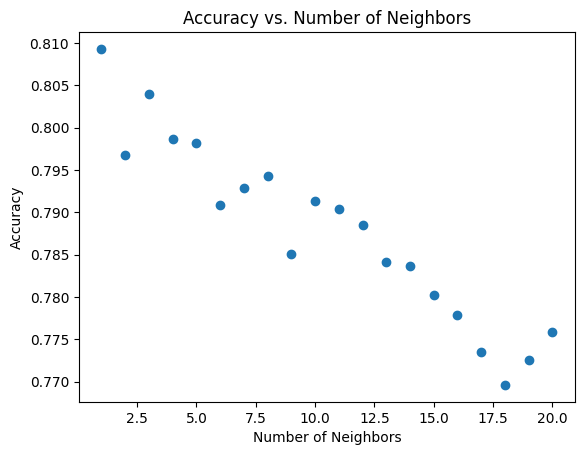

Top 5 Accuracy with Corresponding Number of Neighbors:
1. k=1: 0.809
2. k=3: 0.804
3. k=4: 0.799
4. k=5: 0.798
5. k=2: 0.797


In [206]:
# Số lượng hàng xóm từ 1 đến 20
n_neighbors_list = list(range(1, 21))

# Lưu trữ kết quả của từng số lượng hàng xóm
accuracy_list = []

# Duyệt qua từng số lượng hàng xóm và thực hiện chia tập dữ liệu
for n_neighbors in n_neighbors_list:
    accuracy = knn_model(X_train, y_train, X_test, y_test, n_neighbors)
    accuracy_list.append(accuracy)

# Vẽ biểu đồ scatter
plt.scatter(n_neighbors_list, accuracy_list)
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Lấy danh sách top 5 điểm cao nhất
top5_indices = np.argsort(accuracy_list)[-5:][::-1]
top5_neighbors = [n_neighbors_list[i] for i in top5_indices]
top5_accuracies = [accuracy_list[i] for i in top5_indices]

# In danh sách top 5
print("Top 5 Accuracy with Corresponding Number of Neighbors:")
for i, (k, acc) in enumerate(zip(top5_neighbors, top5_accuracies), 1):
    print(f"{i}. k={k}: {acc:.3f}")


<b>Applying Decision Tree</b>

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def decision_tree_model(X_train, y_train, X_test, y_test, max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: ", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds: ", y_pred[:5], "\n")

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

    # Tạo ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Biểu diễn ma trận nhầm lẫn dưới dạng DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # In ma trận nhầm lẫn dưới dạng bảng số
    print("Confusion Matrix:")
    print(conf_matrix_df)

# Sử dụng hàm với độ sâu tối đa là 11
decision_tree_model(X_train, y_train, X_test, y_test, max_depth=11)



Accuracy:  0.7913843175217812 

preds:  [1 0 0 1 0] 

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1033
           1       0.77      0.83      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          782          251
Actual 1          180          853


Top 5 Max Depths:
Max Depth: 10, Accuracy: 0.789
Max Depth: 11, Accuracy: 0.788
Max Depth: 5, Accuracy: 0.788
Max Depth: 15, Accuracy: 0.786
Max Depth: 13, Accuracy: 0.785


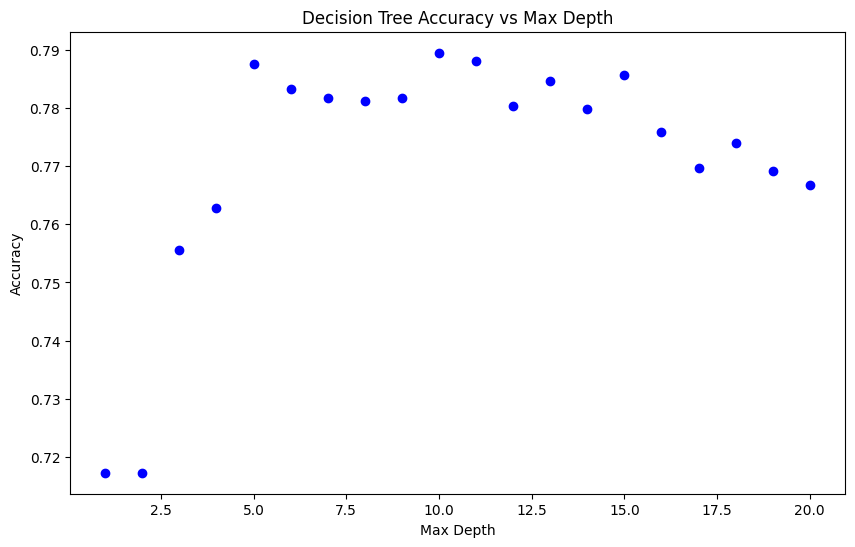

In [276]:
# Lưu trữ kết quả của từng lần thử nghiệm
results = []

# Thực hiện tìm kiếm độ sâu tối ưu từ 1 đến 20
for max_depth in range(1, 21):
    max_depth_val, acc_val = decision_tree_model(X_train, y_train, X_test, y_test, max_depth)
    results.append((max_depth_val, acc_val))

# Sắp xếp theo độ chính xác giảm dần và lấy top 5
top_5_results = sorted(results, key=lambda x: x[1], reverse=True)[:5]

# In ra top 5
print("Top 5 Max Depths:")
for max_depth, acc in top_5_results:
    print(f"Max Depth: {max_depth}, Accuracy: {acc:.3f}")

# Vẽ biểu đồ scatter
max_depth_values, accuracy_values = zip(*results)
plt.figure(figsize=(10, 6))
plt.scatter(max_depth_values, accuracy_values, color='blue')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


<b>Applying Random Forest</b>



In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Danh sách các tham số cần tinh chỉnh và các giá trị khả thi
param_grid = {
    'n_estimators': [800, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất từ kết quả Grid Search
best_rf_model = grid_search.best_estimator_

# Hiển thị thông số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
accuracy = best_rf_model.score(X_test, y_test)
print(f'Accuracy on Test Set: {accuracy}')


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Accuracy on Test Set: 0.8368828654404646


Accuracy on Test Set: 0.8368828654404646

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.82      0.87      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



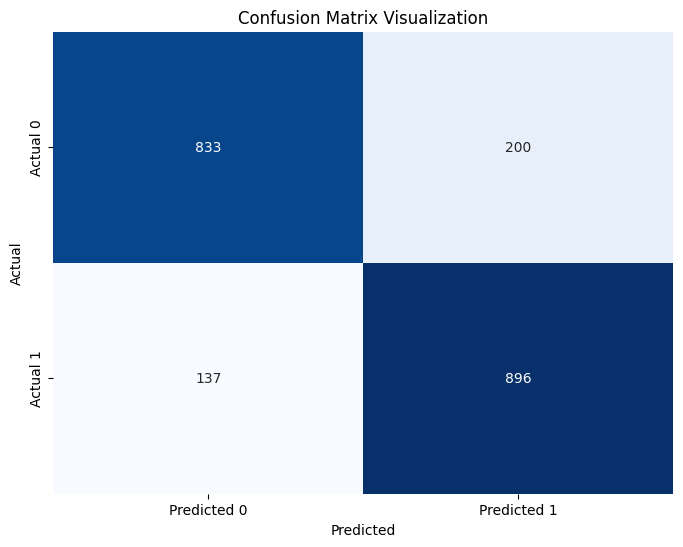

In [298]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    # Đánh giá mô hình trên tập kiểm tra
    accuracy = model.score(X_test, y_test)
    print(f'Accuracy on Test Set: {accuracy}')

    # Dự đoán
    y_pred = model.predict(X_test)

    # Báo cáo phân loại
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Biểu đồ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Visualization')
    plt.show()

# Sử dụng hàm để đánh giá mô hình Random Forest đã được tinh chỉnh
evaluate_model(best_rf_model, X_test, y_test)


<p style='color: red'>This is final model i need to find, Go to save model<b>

In [300]:
import pickle

def save_model(model, save_model_path='saved_model.pkl'):
    with open(save_model_path, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f'Model saved successfully to {save_model_path}')
# Lưu mô hình
save_model(best_rf_model, save_model_path='best_rf_model.pkl')


Model saved successfully to best_rf_model.pkl


<b>Tìm Threshold<b>

Tải mô hình đã lưu từ tệp pickle:

In [36]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

with open('best_rf_model.pkl', 'rb') as model_file:
    best_rf_model = pickle.load(model_file)

Dự đoán xác suất cho lớp 1 trên tập dữ liệu kiểm tra:

In [31]:
y_probs = best_rf_model.predict_proba(X_test)[:, 1]


Tính Precision, Recall và ngưỡng:

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

Vẽ đồ thị:


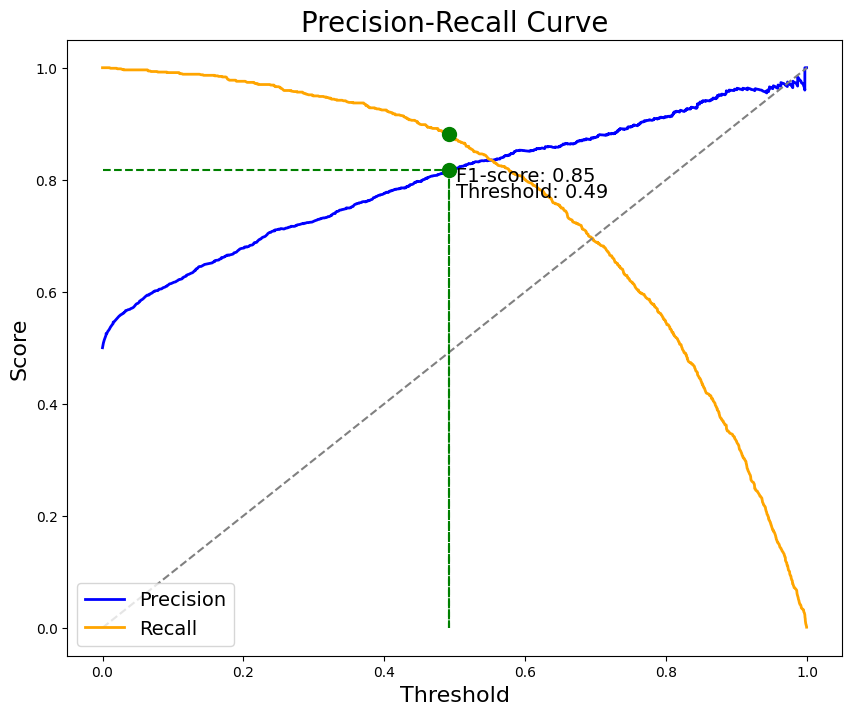

Best Threshold for F1-score: 0.49177233589051256


In [34]:
# Vẽ đồ thị
plt.figure(figsize=(10, 8))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', color='orange', linewidth=2)

# Thêm đường chéo
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Tính F1-score cho mỗi ngưỡng
f1_scores = 2*recall*precision / (recall + precision)

# Tìm ngưỡng tối ưu
opt_idx = np.argmax(f1_scores)
opt_threshold = thresholds[opt_idx]
opt_precision = precision[opt_idx]
opt_recall = recall[opt_idx]

# Vẽ ngưỡng tối ưu
plt.plot([opt_threshold, opt_threshold], [0, opt_precision], linestyle='--', color='green')
plt.plot([0, opt_threshold], [opt_precision, opt_precision], linestyle='--', color='green')
plt.plot([opt_threshold], [opt_precision], marker='o', markersize=10, color='green')
plt.plot([opt_threshold, opt_threshold], [opt_precision, 0], linestyle='--', color='green')
plt.plot([opt_threshold], [opt_recall], marker='o', markersize=10, color='green')

# Thêm chú thích
plt.text(opt_threshold+0.01, opt_precision-0.02, f'F1-score: {f1_scores[opt_idx]:.2f}', fontsize=14)
plt.text(opt_threshold+0.01, opt_precision-0.05, f'Threshold: {opt_threshold:.2f}', fontsize=14)

# Thêm nhãn cho trục và tiêu đề
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(fontsize=14)
plt.title('Precision-Recall Curve', fontsize=20)
plt.show()

# Tìm ngưỡng cho F1-score tốt nhất
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold for F1-score: {best_threshold}')



## Các TH còn lại 7,5,4,3,1 đặc trưng quan trọng

### KNN

In [525]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [526]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [527]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify= y_sm)

In [528]:
from sklearn.metrics import confusion_matrix

# Hàm huấn luyện và đánh giá mô hình với KNN và in ma trận nhầm lẫn
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_knn
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=3)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.7683013503909026
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Confusion Matrix:
[[891 142]
 [184 190]]


Results for 5 features:
Accuracy: 0.7547974413646056
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1033
           1       0.55      0.45      0.49       374

    accuracy                           0.75      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.75      0.75      1407

Confusion Matrix:
[[893 140]
 [205 169]]


Results for 4 features:
Accuracy: 0.7512437810945274
Classification Report:
              precision    reca

### Decision Tree

In [529]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=5):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_decision_tree
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list_decision_tree = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=5)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list_decision_tree.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.7903340440653873
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Confusion Matrix:
[[885 148]
 [147 227]]


Results for 5 features:
Accuracy: 0.7796730632551528
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.42      0.50       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407

Confusion Matrix:
[[939  94]
 [216 158]]


Results for 4 features:
Accuracy: 0.7768301350390903
Classification Report:
              precision    reca

### Random Forest

In [530]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=800):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    
    # In kết quả chỉ từ hàm train_and_evaluate_random_forest
    print(f'\nResults for {X_train.shape[1]} features:')
    print(f'Accuracy: {acc}')
    print(f'Classification Report:\n{cl_rep}')
    
    # Tính và in ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n{"="*50}\n')
    
    return acc, y_pred, cl_rep, conf_matrix

# Lưu trữ kết quả của từng trường hợp
result_list_random_forest = []

# Duyệt qua từng số lượng đặc trưng và thực hiện chia tập dữ liệu
for num_features in num_features_list:
    selected_features = selected_feature_names[:num_features]
    
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=15, stratify=y)
    
    # Huấn luyện và đánh giá hiệu suất
    accuracy, y_pred, classification_rep, conf_matrix = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=800)
    
    # Lưu kết quả vào danh sách (nếu bạn cần)
    result_list_random_forest.append((accuracy, classification_rep, conf_matrix))



Results for 7 features:
Accuracy: 0.7725657427149965
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407

Confusion Matrix:
[[906 127]
 [193 181]]


Results for 5 features:
Accuracy: 0.7619047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.57      0.44      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407

Confusion Matrix:
[[906 127]
 [208 166]]


Results for 4 features:
Accuracy: 0.7661691542288557
Classification Report:
              precision    reca